## Parcial 4 (80%).

### Lea las siguientes instrucciones y resuelva el parcial.



*   Lea cada numeral que se encuentra a continuación. Resuelva utilizando este notebook
*   El parcial debe enviarse haciendo uso de git. No se reciben archivos de otra forma. Tenga en cuenta que se debe subir usando git bash y no cargar desde la web, los archivos que se suban desde la web serán descartados.



### Punto 1

Utilice programación orientada a objetos POO para crear un sistema o máquina de la siguiente forma.



*   El sistema tiene 3 luces, una roja para las alarmas, una verde para el funcionamiento y una amarilla para las alertas.
*   El sistema tiene un sensor de presión en bares, un sensor de tensión eléctrica en voltios y un sensor de velocidad en RPMs.
*   El sistema muestra alertas con la luz amarilla si hay algún sensor fuera del rango de operación. Esto es, de 0 a 10 bares, de 120 a 240 voltios y de 8 a 12 RPMs.
*   El sistema muestra alarma si hay 2 sensores o más fuera del rango de operación.
*   Las RPMs vienen de un motor que depende de la corriente para modificar su velocidad, esta corriente a su vez depende del voltaje sabiendo que la potencia es un valor fijo que ud seleccionará. Recuerde que P = V.I.
*   Al incio las variables de operación deben iniciar en un valor dentro del rango, se da un start para inciar el proceso y se debe simular el funcionamiento del sistema con variables aleatorias para los sensores y corriente del motor. Además se debe mostrar los tiempos de alerta, alarma y funcionamiento del motor con un método de mostrar_informacion().
* Utilice al menos 4 métodos.



In [ ]:
# PUNTO 1.

# importamos librerias necesarias
import random
import time

# creamos las clases y los metodos

class Luz:
    def __init__(self, color):
        self.color = color
        self.encendida = False

    def encender(self):
        self.encendida = True

    def apagar(self):
        self.encendida = False

    def __str__(self):
        return f"Luz {self.color}: {'Encendida' if self.encendida else 'Apagada'}"

class Sensor:
    def __init__(self, tipo, rango_min, rango_max):
        self.tipo = tipo
        self.valor = 0
        self.rango_min = rango_min
        self.rango_max = rango_max

    def leer_valor(self):
        self.valor = random.uniform(self.rango_min - 5, self.rango_max + 5)

    def esta_fuera_de_rango(self):
        return self.valor < self.rango_min or self.valor > self.rango_max

    def __str__(self):
        return f"Sensor {self.tipo}: {self.valor:.2f}"

class Sistema:
    def __init__(self, potencia):
        self.luz_roja = Luz("Roja")
        self.luz_amarilla = Luz("Amarilla")
        self.luz_verde = Luz("Verde")
        self.sensores = [
            Sensor("Presión", 0, 10),
            Sensor("Tensión", 120, 240),
            Sensor("Velocidad", 8, 12)
        ]
        self.potencia = potencia
        self.tiempo_alerta = 0
        self.tiempo_alarma = 0
        self.tiempo_funcionamiento = 0
        self.estado_actual = "funcionamiento"
        self.iniciar_valores_sensores()

    def iniciar_valores_sensores(self):
        for sensor in self.sensores:
            sensor.valor = random.uniform(sensor.rango_min, sensor.rango_max)

    def calcular_corriente(self, voltaje):
        return self.potencia / voltaje

    def actualizar_sensores(self):
        for sensor in self.sensores:
            sensor.leer_valor()
        # Actualizar velocidad en función del voltaje
        voltaje = self.sensores[1].valor
        corriente = self.calcular_corriente(voltaje)
        self.sensores[2].valor = corriente * 10  # Supongamos que la velocidad en RPM es proporcional a la corriente

    def verificar_estado(self):
        fuera_de_rango = sum(sensor.esta_fuera_de_rango() for sensor in self.sensores)
        if fuera_de_rango >= 2:
            self.luz_roja.encender()
            self.luz_amarilla.apagar()
            self.luz_verde.apagar()
            self.actualizar_tiempo("alarma")
        elif fuera_de_rango == 1:
            self.luz_roja.apagar()
            self.luz_amarilla.encender()
            self.luz_verde.apagar()
            self.actualizar_tiempo("alerta")
        else:
            self.luz_roja.apagar()
            self.luz_amarilla.apagar()
            self.luz_verde.encender()
            self.actualizar_tiempo("funcionamiento")

    def actualizar_tiempo(self, nuevo_estado):
        if self.estado_actual != nuevo_estado:
            tiempo_actual = time.time()
            if self.estado_actual == "funcionamiento":
                self.tiempo_funcionamiento += tiempo_actual - self.inicio_estado
            elif self.estado_actual == "alerta":
                self.tiempo_alerta += tiempo_actual - self.inicio_estado
            elif self.estado_actual == "alarma":
                self.tiempo_alarma += tiempo_actual - self.inicio_estado
            self.inicio_estado = tiempo_actual
            self.estado_actual = nuevo_estado

    def start(self):
        self.inicio_estado = time.time()
        try:
            while True:
                self.actualizar_sensores()
                self.verificar_estado()
                self.mostrar_informacion()
                # con este parametro podemos variar el tiempo de muestra
                time.sleep(2)  # Simulación del tiempo real
        except KeyboardInterrupt:
            print("\nSimulación terminada.")
    # metodo para mostrar informacion
    def mostrar_informacion(self):
        print("\nEstado del Sistema:")
        for sensor in self.sensores:
            print(sensor)
        print(self.luz_roja)
        print(self.luz_amarilla)
        print(self.luz_verde)
        print(f"Tiempo en Funcionamiento: {self.tiempo_funcionamiento:.2f} segundos")
        print(f"Tiempo en Alerta: {self.tiempo_alerta:.2f} segundos")
        print(f"Tiempo en Alarma: {self.tiempo_alarma:.2f} segundos")

if __name__ == "__main__":
    sistema = Sistema(potencia=1000)  # Por ejemplo, potencia fija de 1000 W
    sistema.start()



Estado del Sistema:
Sensor Presión: 7.57
Sensor Tensión: 118.81
Sensor Velocidad: 84.17
Luz Roja: Encendida
Luz Amarilla: Apagada
Luz Verde: Apagada
Tiempo en Funcionamiento: 0.00 segundos
Tiempo en Alerta: 0.00 segundos
Tiempo en Alarma: 0.00 segundos

Estado del Sistema:
Sensor Presión: -2.68
Sensor Tensión: 238.03
Sensor Velocidad: 42.01
Luz Roja: Encendida
Luz Amarilla: Apagada
Luz Verde: Apagada
Tiempo en Funcionamiento: 0.00 segundos
Tiempo en Alerta: 0.00 segundos
Tiempo en Alarma: 0.00 segundos

Estado del Sistema:
Sensor Presión: 11.99
Sensor Tensión: 182.47
Sensor Velocidad: 54.80
Luz Roja: Encendida
Luz Amarilla: Apagada
Luz Verde: Apagada
Tiempo en Funcionamiento: 0.00 segundos
Tiempo en Alerta: 0.00 segundos
Tiempo en Alarma: 0.00 segundos

Simulación terminada.


### Punto 2

Utilice la base de datos de NBA para realizar:

* Un filtrado básico de los datos eliminando datos faltantes, datos atípicos, haciendo descripción de estadísticas básicas
* Al menos 5 gráficas diferentes informativas (al menos 3 tipos diferentes de gráficas y puede combinar con las variables a usar). Usted selecciona las variables de interés y lo que desea analizar.




In [ ]:
# PUNTO # 2

import pandas as pd
import numpy as np


# Cargar los datos desde un archivo CSV
df = pd.read_csv('/content/nba.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Eliminar filas con datos faltantes
df.dropna(inplace=True)

# Descripción básica de estadísticas
print(df.describe())

# Eliminar datos atípicos (outliers) usando el método de los cuartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.describe())




   Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# instalamos libreria para poder graficar
pip install matplotlib seaborn

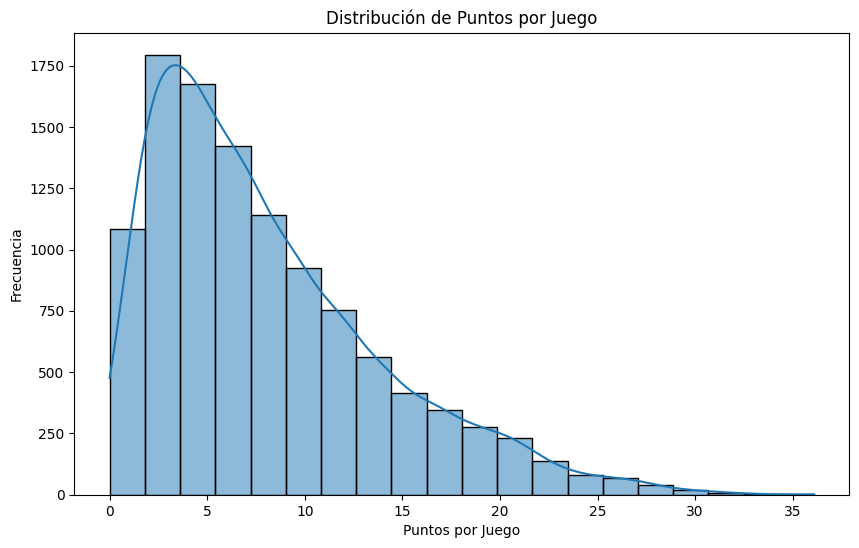

In [ ]:
# GRAFICA # 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['pts'], bins=20, kde=True)
plt.title('Distribución de Puntos por Juego')
plt.xlabel('Puntos por Juego')
plt.ylabel('Frecuencia')
plt.show()


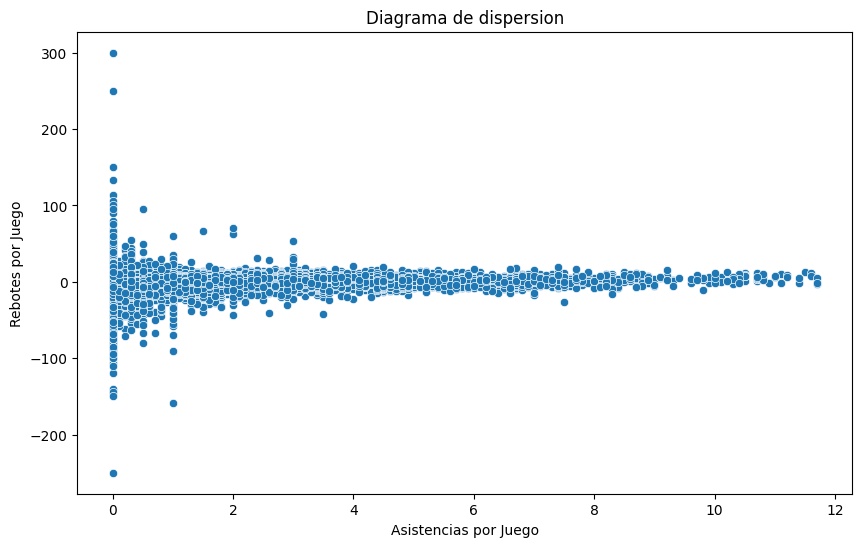

In [ ]:
# GRAFICA # 2

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ast', y='net_rating', data=df)
plt.title('Diagrama de dispersion')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Rebotes por Juego')
plt.show()

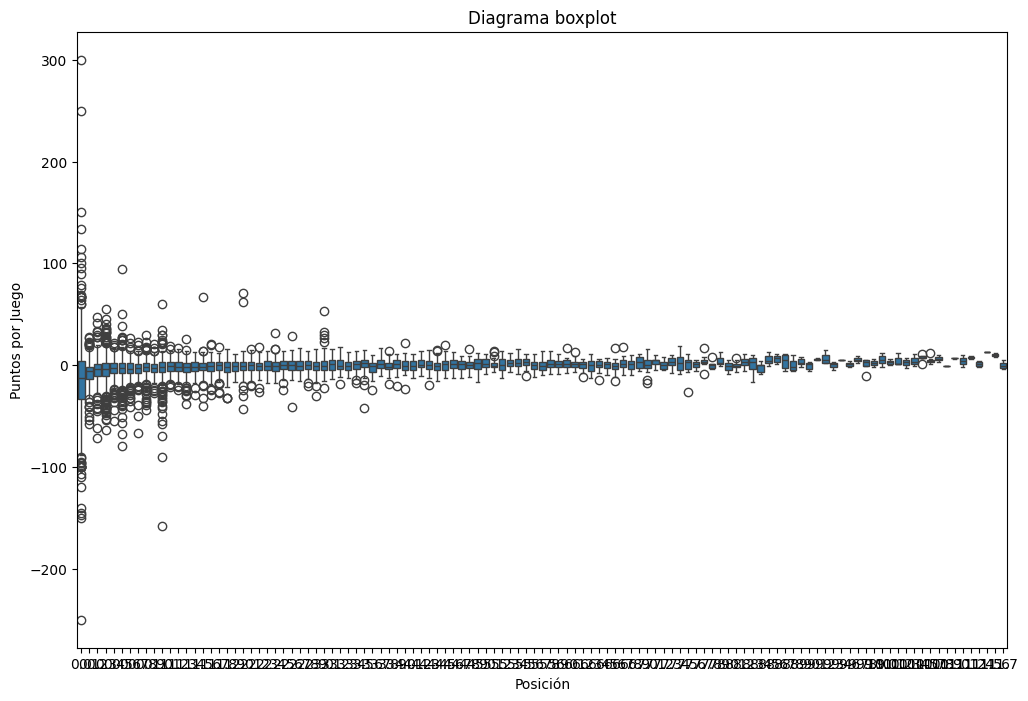

In [ ]:
# GRAFICA # 3

plt.figure(figsize=(12, 8))
sns.boxplot(x='ast', y='net_rating', data=df)
plt.title('Diagrama boxplot')
plt.xlabel('Posición')
plt.ylabel('Puntos por Juego')
plt.show()

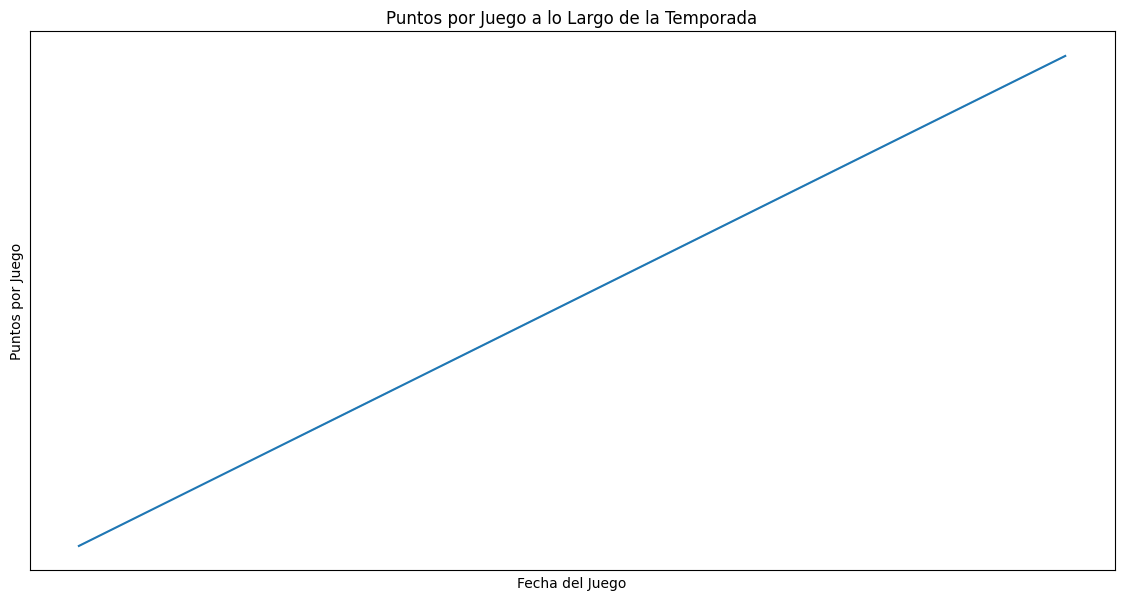

In [ ]:
# GRAFICA # 4


df['player_height'] = pd.to_datetime(df['player_height'])
df = df.sort_values('player_height')

plt.figure(figsize=(14, 7))
sns.lineplot(x='player_height', y='player_height', data=df)
plt.title('Puntos por Juego a lo Largo de la Temporada')
plt.xlabel('Fecha del Juego')
plt.ylabel('Puntos por Juego')
plt.show()



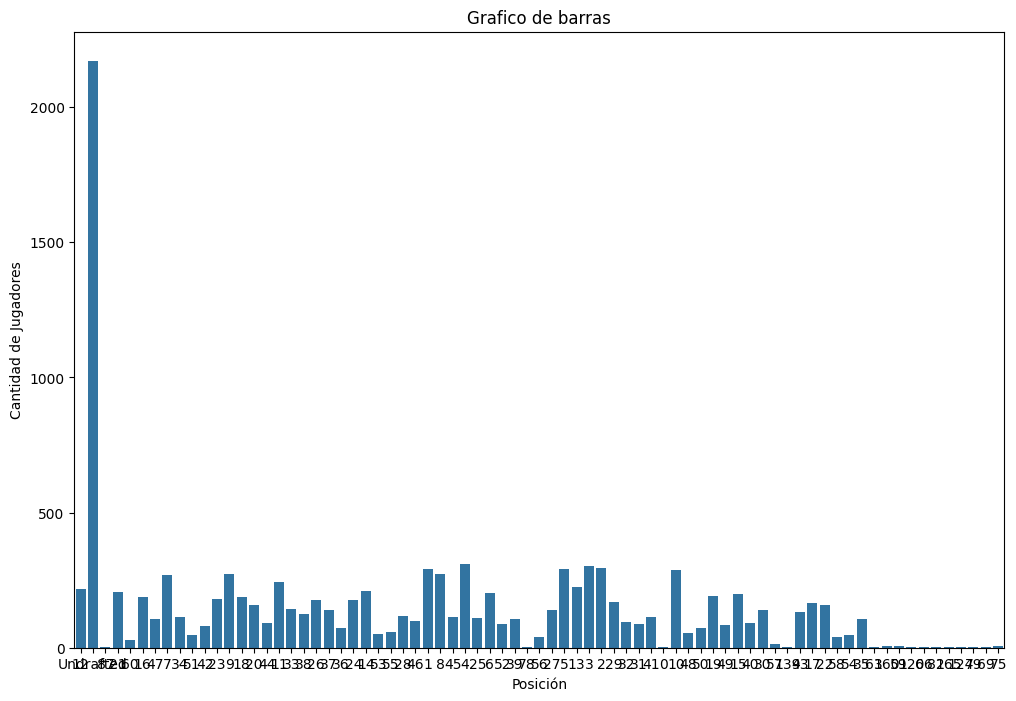

In [ ]:

# GRAFICA # 5

plt.figure(figsize=(12, 8))
sns.countplot(x='draft_number', data=df)
plt.title('Grafico de barras')
plt.xlabel('Posición')
plt.ylabel('Cantidad de Jugadores')
plt.show()


### Punto 3

Utilice la carpeta audios para:

* Cargar los audios y graficar las ondas en un gráfica con múltiples plots.
* Mostrar el espectrograma de cada audio usando múltiples plots.
* Tratar de filtrar en el audio más largo que es de una finca de animales algún sonido particular de algún animal.

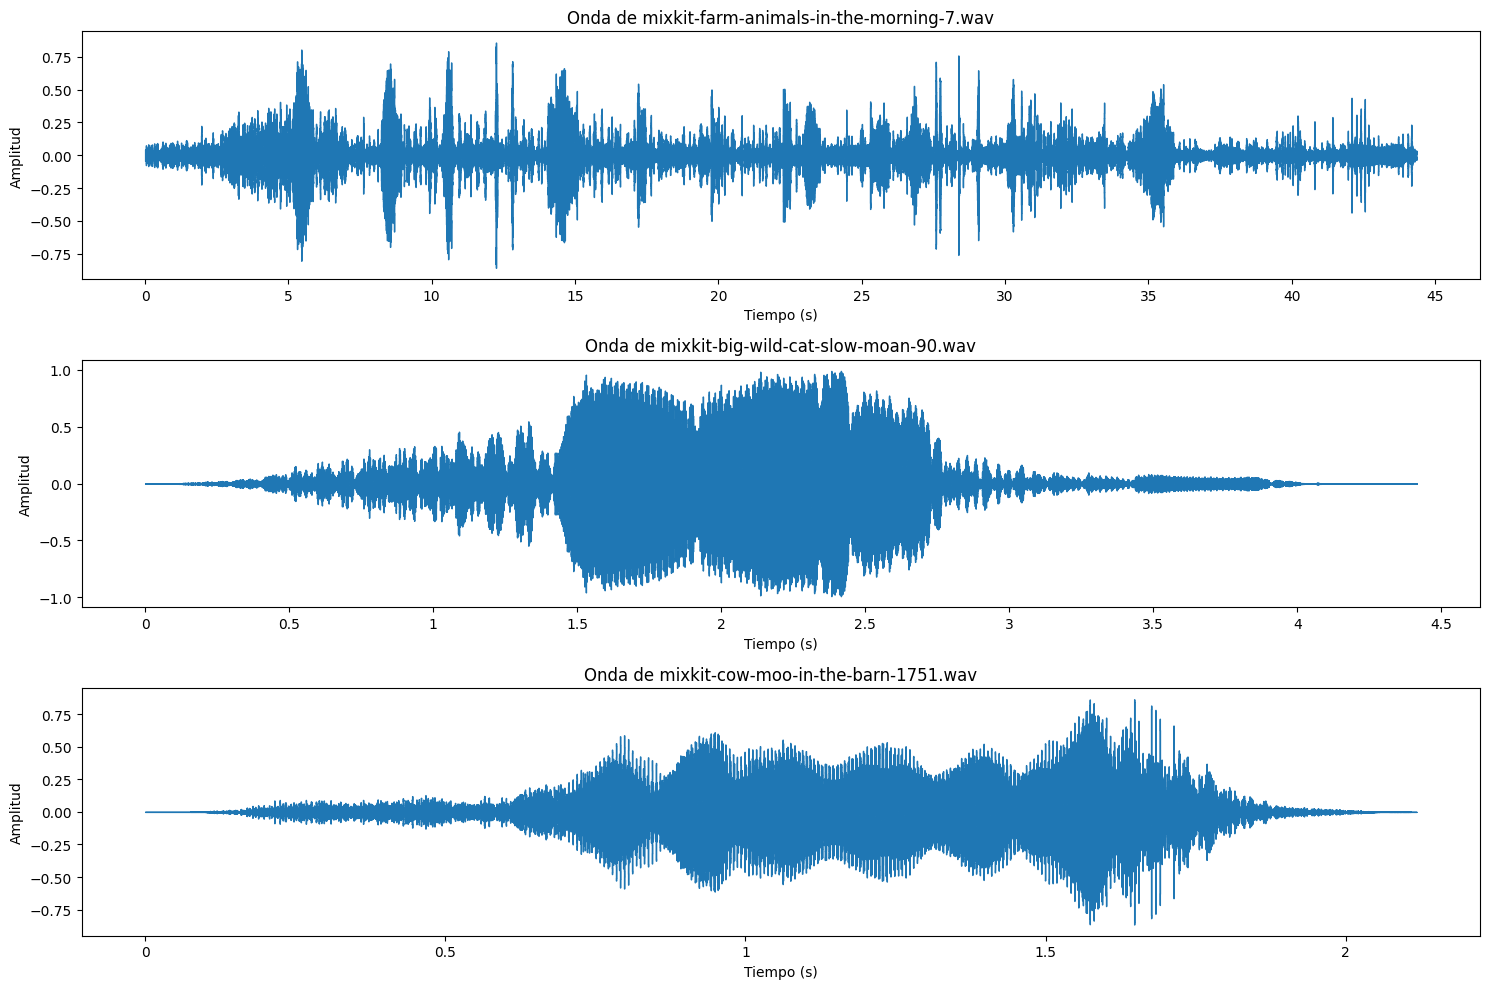

In [ ]:
# CARGAR AUDIOS A COLAB Y GRAFICAR LAS ONDAS

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Directorio de los audios
audio_dir = '/content/audios'

# Obtener lista de archivos de audio
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

# Cargar y graficar las ondas de los audios
plt.figure(figsize=(15, 10))

for i, audio_file in enumerate(audio_files):
    # Cargar audio
    audio_path = os.path.join(audio_dir, audio_file)
    y, sr = librosa.load(audio_path)

    # Crear subplot
    plt.subplot(len(audio_files), 1, i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Onda de {audio_file}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


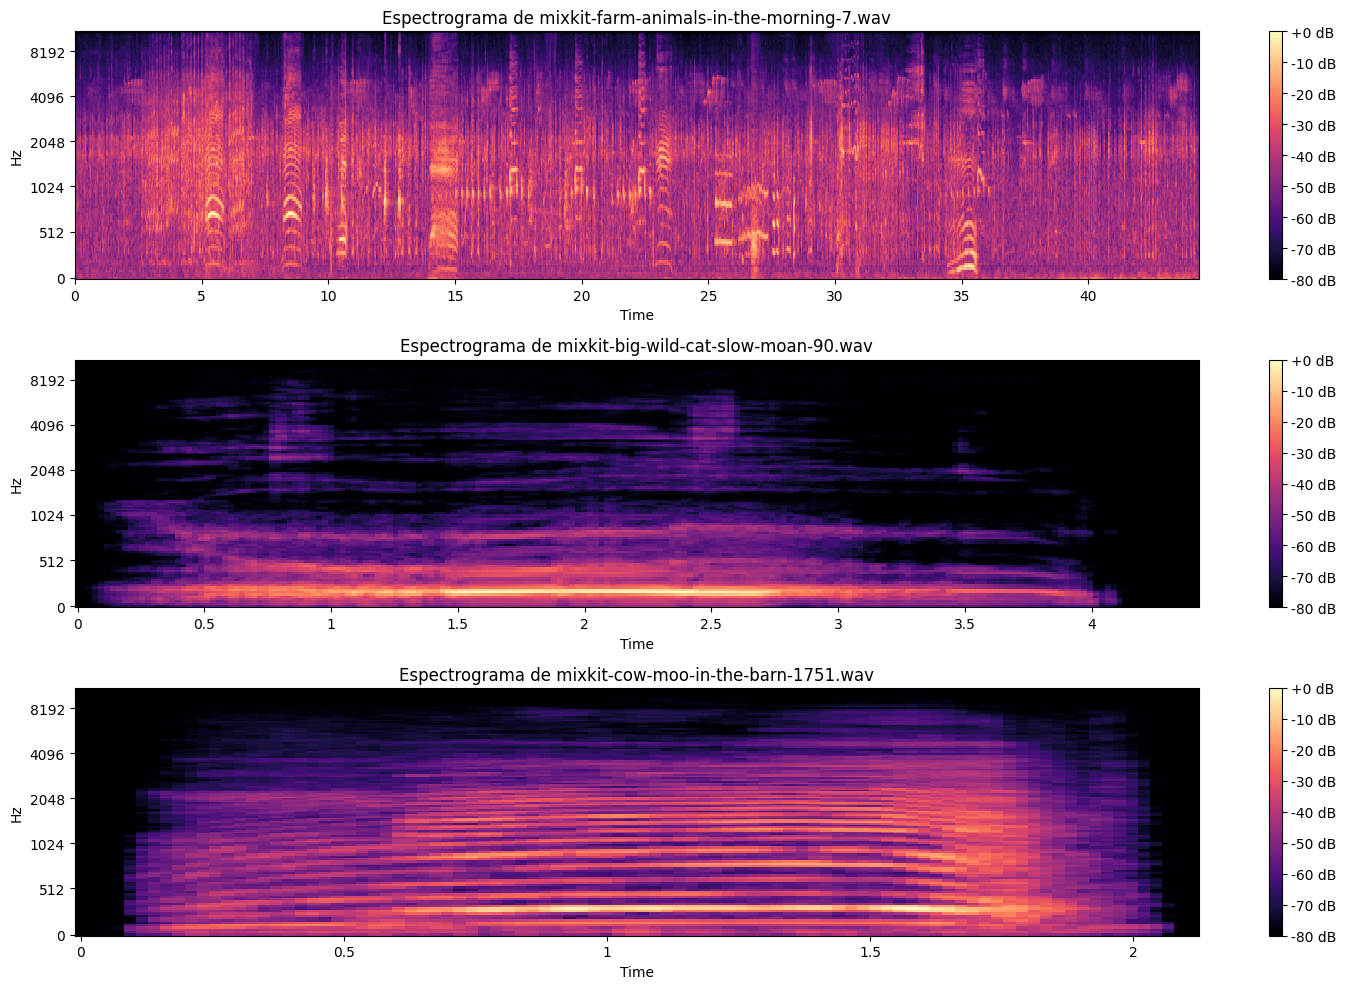

In [ ]:
# CODIGO DE ESPECTOGRAMA DE CADA AUDIO

plt.figure(figsize=(15, 10))

for i, audio_file in enumerate(audio_files):
    # Cargar audio
    audio_path = os.path.join(audio_dir, audio_file)
    y, sr = librosa.load(audio_path)

    # Crear subplot
    plt.subplot(len(audio_files), 1, i + 1)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma de {audio_file}')

plt.tight_layout()
plt.show()


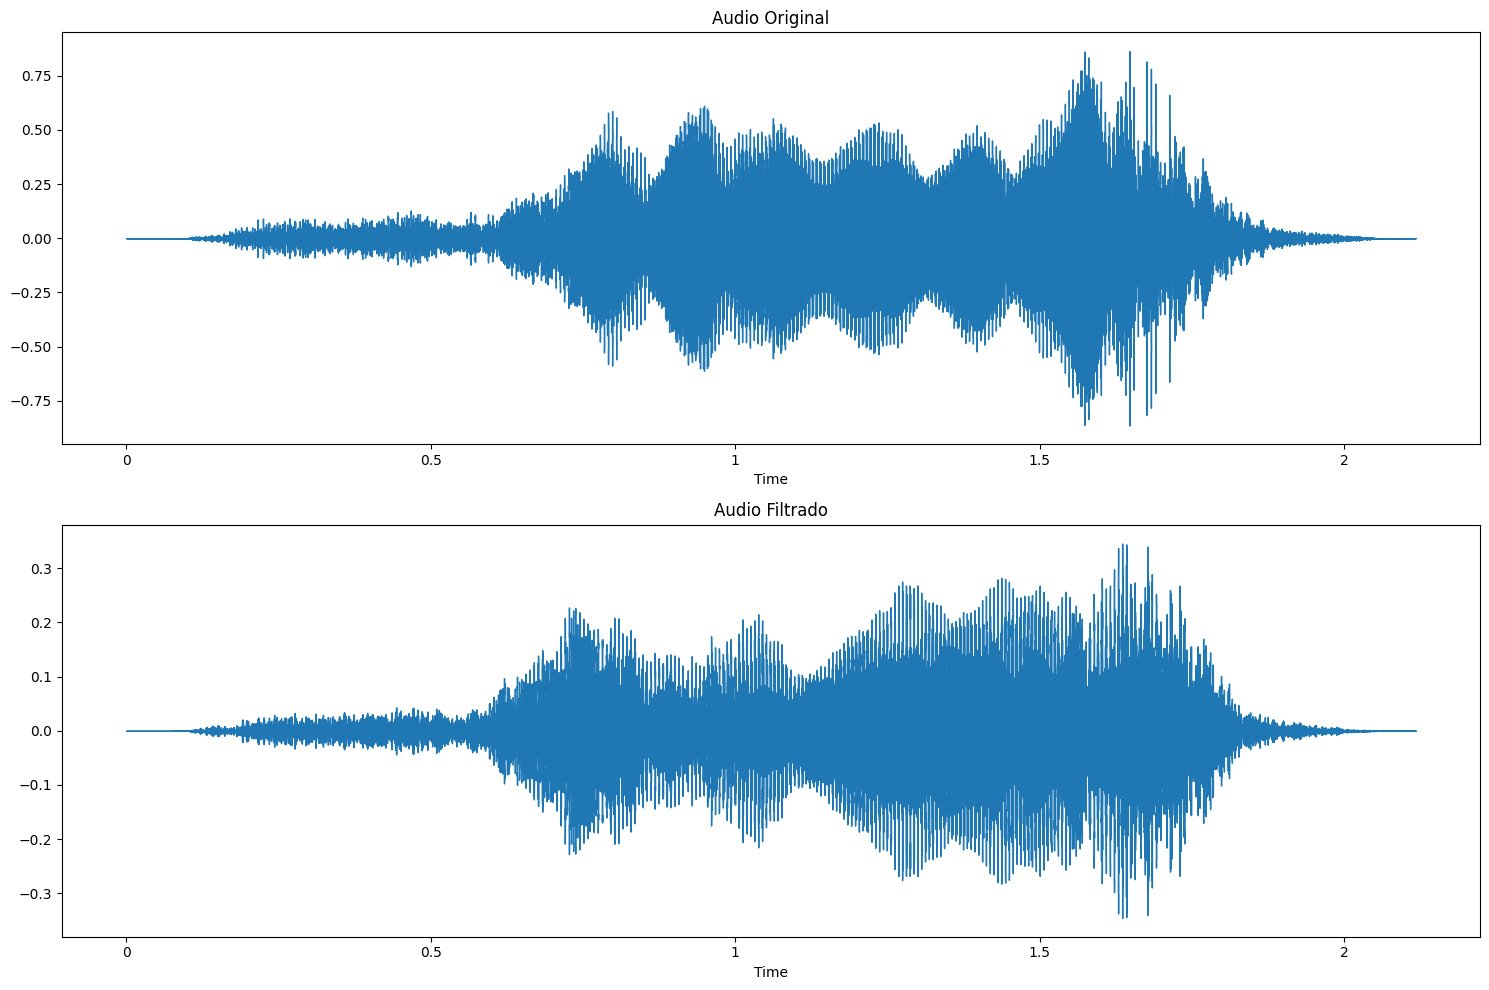

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


longest_audio_path = os.path.join(audio_dir, audio_files[-1])
y, sr = librosa.load(longest_audio_path)

# banda de frecuencias para el filtro (ajustar según sea necesario)
lowcut = 500.0
highcut = 1500.0

# Aplicar el filtro de paso de banda
filtered_y = bandpass_filter(y, lowcut, highcut, sr, order=6)

# Graficar el audio original y el filtrado
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Original')

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_y, sr=sr)
plt.title('Audio Filtrado')

plt.tight_layout()
plt.show()
